# ДЗ №5 | Градиентный спуск 2 | Серкибаев Аким, Э-2209

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Начальные данные

In [4]:
np.random.seed(42)
X = np.arange(1, 101)
Y = 5 * X + 7 + np.random.uniform(-20, 20, size=len(X)) #шум

## Определим функцию потерь (MSE)

In [6]:
def compute_loss(X, Y, w, b):
    n = len(X)
    loss = np.sum((Y - (w * X + b)) ** 2) / (2 * n)
    return loss

## Градиенты и градиентный спуск

In [8]:
def compute_gradients(X, Y, w, b):
    n = len(X)
    dw = -np.sum(X * (Y - (w * X + b))) / n
    db = -np.sum(Y - (w * X + b)) / n
    return dw, db

## Реализация градиентного спуска

In [10]:
def gradient_descent(X, Y, w_init=0, b_init=0, lr=0.0001, epochs=100000, tol=1e-3):
    w, b = w_init, b_init
    i = 0
    while i < epochs:
        dw, db = compute_gradients(X, Y, w, b)
        
        #обновим параметры
        w -= lr * dw
        b -= lr * db

        #условие остановки
        if np.sqrt(dw**2 + db**2) < tol:
            break
        
        i += 1

    return w, b

## Запуск градиентного спуска

In [12]:
w_opt, b_opt = gradient_descent(X, Y)
print(f"Оптимальные параметры: w = {w_opt:.4f}, b = {b_opt:.4f}")

Оптимальные параметры: w = 5.0150, b = 4.9362


## Визуализация результатов

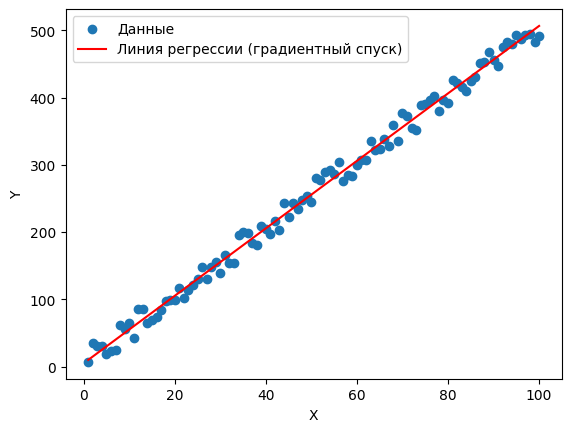

In [14]:
plt.scatter(X, Y, label="Данные")
plt.plot(X, w_opt * X + b_opt, color="red", label="Линия регрессии (градиентный спуск)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Дополнительное выполнение

### Сравнение с методом наименьших квадратов

In [17]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

print(f"Градиентный спуск: w = {w_opt:.4f}, b = {b_opt:.4f}")
print(f"Аналитическое решение: w = {model.coef_[0]:.4f}, b = {model.intercept_:.4f}")

Градиентный спуск: w = 5.0150, b = 4.9362
Аналитическое решение: w = 5.0083, b = 5.3891


Градиентный спуск успешно сошелся к почти оптимальным параметрам